## Single, central model for PM2.5 prediction

In [30]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

import pm25_beijing

DATA_PATH = "data/pollution-data/"
FEATURES_TO_USE = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "wd", "month", "day", "hour"]
TIMESTEPS = 48 # How many steps the LSTM should take into account
NUM_REG_CLASSES = 3
MODEL_PATH_PREFIX = "models/central_model/"

In [2]:
# With this DataHandler the run function does not need to preprocess everything again
data = pm25_beijing.DataHandler(DATA_PATH, features_to_use=FEATURES_TO_USE, col_to_predict=["PM2.5"])
data.preprocess_data(minmax_features=FEATURES_TO_USE)
data.interpolate()
data.create_model_input(TIMESTEPS, save_data=True)
_, data_labels = data.create_classes(NUM_REG_CLASSES, features=["PM2.5"])

Recognized wd (wind direction) as feature. Create columns north, east, south and west automatically.
Creating multiple classes from wd (wind direction):


100%|██████████| 12/12 [00:29<00:00,  2.48s/it]


Aotizhongxin (1/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1214.92it/s]


Changping (2/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1217.35it/s]


Dingling (3/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1217.28it/s]


Dongsi (4/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:29<00:00, 1206.22it/s]


Guanyuan (5/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1219.25it/s]


Gucheng (6/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1212.25it/s]


Huairou (7/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1219.84it/s]


Nongzhanguan (8/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1213.55it/s]


Shunyi (9/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1217.40it/s]


Tiantan (10/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1208.01it/s]


Wanliu (11/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1215.58it/s]


Wanshouxigong (12/12)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:28<00:00, 1217.11it/s]


In [ ]:
lstm = pm25_beijing.create_lstm(TIMESTEPS, len(FEATURES_TO_USE)+3,
                                num_output_classes=NUM_REG_CLASSES)
# 10 Epochs are enough, afterwards the results become worse
results = pm25_beijing.run_model(data, lstm, features=FEATURES_TO_USE, shuffle=False, epochs=10, metrics=True)

---------------------Preprocessing data--------------------------
-------------------Creating training data------------------------
---------------------Training the model--------------------------
Epoch 1/10
2463/2463 [==============================] - 111s 44ms/step - loss: 0.8215 - accuracy: 0.6011 - val_loss: 0.7023 - val_accuracy: 0.6696
Epoch 2/10
2463/2463 [==============================] - 108s 44ms/step - loss: 0.7351 - accuracy: 0.6571 - val_loss: 0.6567 - val_accuracy: 0.6924
Epoch 3/10
2463/2463 [==============================] - 106s 43ms/step - loss: 0.7051 - accuracy: 0.6753 - val_loss: 0.6353 - val_accuracy: 0.7050
Epoch 4/10
2463/2463 [==============================] - 106s 43ms/step - loss: 0.6884 - accuracy: 0.6857 - val_loss: 0.6277 - val_accuracy: 0.7083
Epoch 5/10
2463/2463 [==============================] - 108s 44ms/step - loss: 0.6765 - accuracy: 0.6917 - val_loss: 0.6578 - val_accuracy: 0.6920
Epoch 6/10
2463/2463 [==============================] - 109s 44ms/s

In [24]:
full_model = results[0]
full_loss = results[1]
full_model_f1 = results[2][0]
full_model_true = results[2][1]
full_model_predicted = results[2][2]

0.7191260185819816

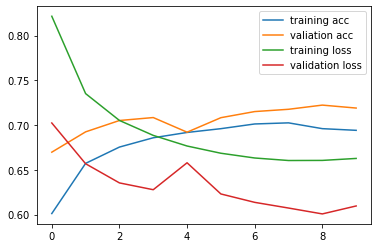

In [22]:
plt.plot(full_loss.history["accuracy"], label="training acc")
plt.plot(full_loss.history["val_accuracy"], label="valiation acc")
plt.plot(full_loss.history["loss"], label="training loss")
plt.plot(full_loss.history["val_loss"], label="validation loss")
plt.legend()

In [23]:
# Save the model
full_model.save(f"{MODEL_PATH_PREFIX}central_model_10ep")

INFO:tensorflow:Assets written to: models/central_model/central_model_10ep/assets


INFO:tensorflow:Assets written to: models/central_model/central_model_10ep/assets


In [ ]:
# Load the model
full_model = keras.models.load_model(f"{MODEL_PATH_PREFIX}central_model_10ep")

In [34]:
# Calculate metrics
train_data, _, train_labels, _ = data.train_test_split(data.model_input, data_labels, TIMESTEPS,
                                                       shuffle_data=False, test_split=0)
f1, true_y, predicted_y = pm25_beijing.get_metrics(full_model, train_data, train_labels, return_labels=True)

3283/3283 [==============================] - 56s 17ms/step


In [35]:
# Mean, Precision, Recall, F1 for full central model
precision, recall, f1, _ = precision_recall_fscore_support(true_y, predicted_y, average="macro")
accuracy = accuracy_score(predictions[1], predictions[2])

print("Precision:   " + str(precision))
print("Recall:      " + str(recall))
print("F1 Score: " + str(f1))
print("Accuracy: " + str(accuracy))
print("Confusion Matrix: ")
print(confusion_matrix(true_y, predicted_y))

Precision:   0.7204470635527525
Recall:      0.7186826777700895
F1 Score: 0.7156260101520838
Accuracy: 0.7191260185819816
Confusion Matrix: 
[[107893  28120   7918]
 [ 18303  76965  42839]
 [  1586  19255 117313]]


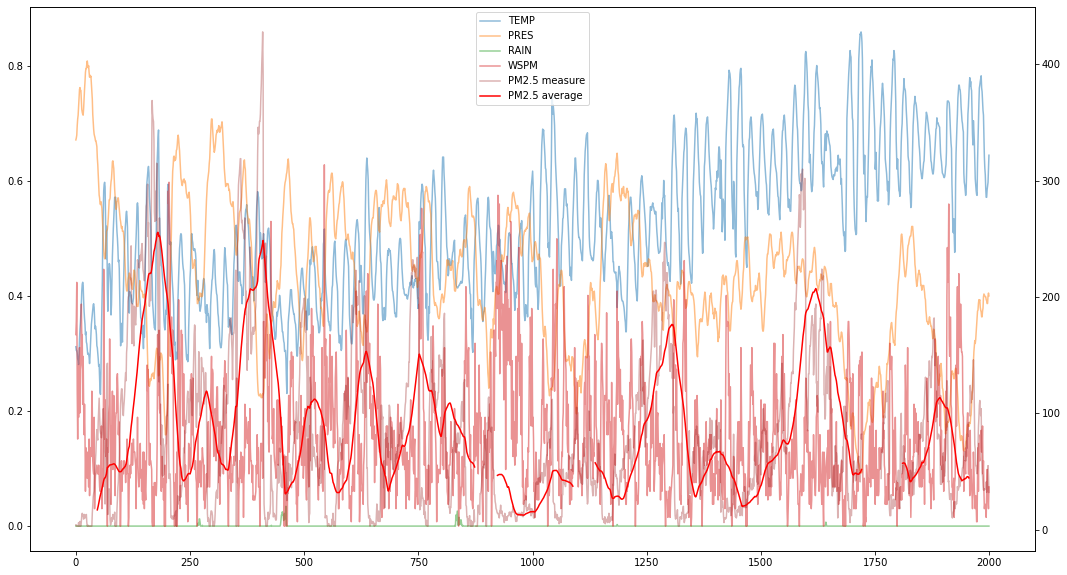

In [19]:
# Example plot of the data, the temp implies the days and years (2000 datapoints are roughly a half a year)
# This function works best for single stations, as the data of the stations overlap (and should not be appended)
# Holes in the PM2.5 average are caused by missing data and will be filled with interpolation
features_to_show = ["TEMP", "PRES", "RAIN", "WSPM"]
pm25_beijing.plot_data(data.data["Guanyuan"], features_to_show, interval=(0, 2000), rolling_avg=TIMESTEPS)